In [1]:
import os
import torch
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from resnet import ResNet34


In [2]:
class_names = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ResNet34(num_classes=10).to(device)
model.load_state_dict(torch.load('resnet34_cifar10.pth', map_location=torch.device('cpu')))
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), p

In [4]:
def load_and_transform_image(image_path):
    image = Image.open(image_path)
    image_transformed = transform(image)
    image_transformed = image_transformed.unsqueeze(0)
    return image, image_transformed.to(device)


In [9]:
def predict_and_show_image(image_path):
    original_image, transformed_image = load_and_transform_image(image_path)
    
    with torch.no_grad():
        outputs = model(transformed_image)
        _, predicted = torch.max(outputs, 1)
        predicted_class = class_names[predicted.item()]
    plt.ion()
    plt.imshow(original_image)
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.show(block = True)

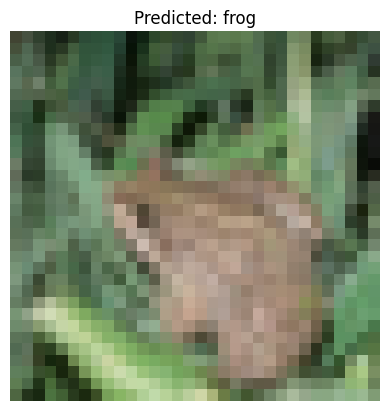

In [10]:
if __name__ == "__main__":
    image_path = "test/images/4_frog.png"
    predict_and_show_image(image_path)


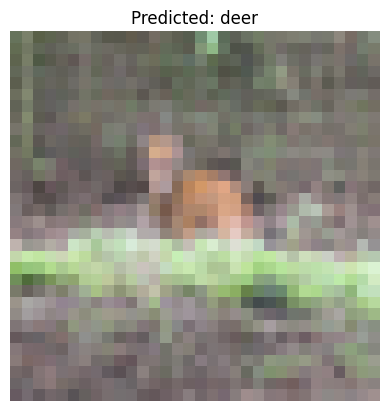

In [11]:
if __name__ == "__main__":
    image_path = "test/images/32_deer.png"
    predict_and_show_image(image_path)


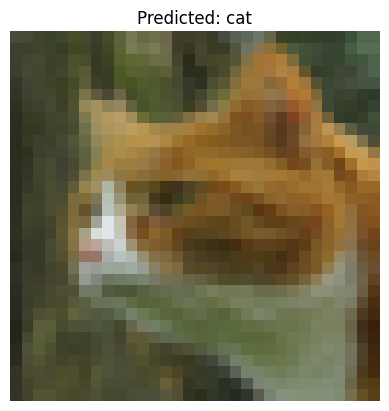

In [12]:
if __name__ == "__main__":
    image_path = "test/images/91_cat.png"
    predict_and_show_image(image_path)
